In [5]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=0)

### 기본 Decision model

In [8]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

In [10]:
print('train :', train_score)
print('test :', test_score) #과대적합..

train : 1.0
test : 0.9020979020979021


### 가지치기

In [11]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

In [13]:
print('train :', train_score)
print('test :', test_score) #가지치기 통해 과대적합 해소

train : 0.9765258215962441
test : 0.916083916083916


In [14]:
from sklearn.tree import export_graphviz
import graphviz

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [16]:
export_graphviz(tree, out_file='tree.dot', class_names=['악성','양성'],
                feature_names=cancer.feature_names, impurity=False, filled=True)
#tree.dot 파일 생성

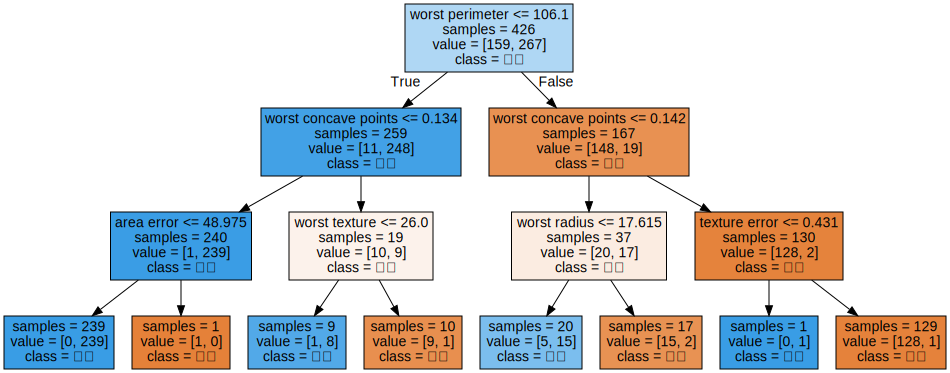

In [17]:
with open('tree.dot', encoding='utf-8') as f : #tree.dot 파일을 f로 명칭
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [24]:
from sklearn.tree import plot_tree

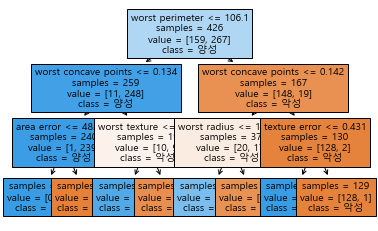

In [27]:
plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer.feature_names,
          impurity=False, filled=True, fontsize=10)
plt.show()

In [28]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-22.9.0               |   py39haa95532_0         888 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b12b

### 특성중요도
- 특성 중요도 : 0~1 사이의 값
    - 0: 이 특성이 전혀 사용되지 않았다
    - 1: 완벽하게 정답값을 예측했다
- 특성중요도의 전체 합 = 1

In [18]:
print('특성 중요도 : \n', tree.feature_importances_) #\n: 줄바꿈
#30개 중 6개 사용된 것 알 수 있음

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01069388
 0.         0.01090021 0.         0.         0.         0.
 0.         0.         0.04022023 0.03226776 0.79120523 0.
 0.         0.         0.         0.11471269 0.         0.        ]


In [19]:
import numpy as np

(-1.0, 30.0)

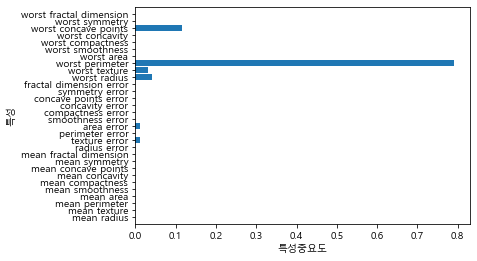

In [21]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)

### decision tree regressor

In [23]:
import os
import mglearn

In [25]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

In [29]:
del ram_prices['Unnamed: 0']
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


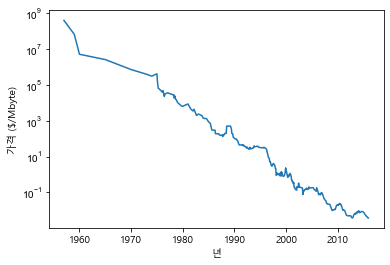

In [26]:
plt.yticks(fontname='Arial') #한글: 지수에서 마이너스를 표현 못하므로, 가능한 폰트로 변경
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [30]:
#2000년 이전 데이터를 훈련데이터로, 2000년 이후 데이터를 테스트데이터로 사용
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [31]:
x_train = data_train.date.to_numpy()[:, np.newaxis]

In [32]:
y_train = np.log(data_train.price)

In [35]:
x_all = ram_prices.date.to_numpy()[:, np.newaxis]

In [36]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

In [37]:
pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

In [38]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

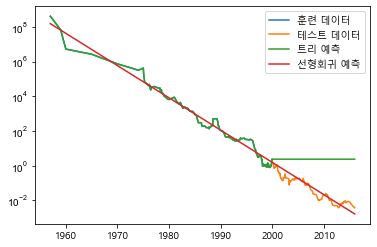

In [39]:
plt.yticks(fontname='Arial') #semilogy: y축을 log로 바꿔줌
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend() #범례
plt.show()